<a href="https://colab.research.google.com/github/park61/opinion_spam/blob/main/Linguistic_analysis_20241111_norm_v2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8_(%EA%B2%B0%EA%B3%BC%ED%99%94%EB%A9%B4%EC%A0%80%EC%9E%A5%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
fake_1 = pd.read_csv("LIWC-22 Results - deceptive_reviews_linguistic.csv")
fake_1.head()

,Polarity,Source,Subfolder,FileName,Content,Segment,WC,Analytic,Clout,Authentic,...,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity
0,Negative Polarity,Deceptive from MTurk,fold1,d_hilton_1.txt,We stayed at the Schicago Hilton for 4 days an...,1,271,50.98,24.31,76.72,...,11.44,0.74,10.33,8.12,6.27,7.01,2.21,18.45,6.27,2.21
1,Negative Polarity,Deceptive from MTurk,fold1,d_hilton_10.txt,Hotel is located 1/2 mile from the train stati...,1,84,83.77,84.23,72.58,...,4.76,2.38,15.48,4.76,3.57,7.14,1.19,10.71,9.52,8.33
2,Negative Polarity,Deceptive from MTurk,fold1,d_hilton_11.txt,I made my reservation at the Hilton Chicago be...,1,196,69.88,1.00,99.00,...,7.65,1.53,16.33,6.63,5.61,5.10,1.53,18.37,6.12,4.59
3,Negative Polarity,Deceptive from MTurk,fold1,d_hilton_12.txt,"When most people think Hilton, they think luxu...",1,147,42.52,2.35,97.81,...,9.52,0.68,8.84,10.88,6.12,3.40,2.04,24.49,11.56,5.44
4,Negative Polarity,Deceptive from MTurk,fold1,d_hilton_13.txt,My husband and I recently stayed stayed at the...,1,209,36.67,73.01,67.19,...,9.09,1.44,9.57,8.61,6.22,8.13,2.39,19.14,7.18,4.31


In [ ]:
fake_1 = fake_1.drop(fake_1.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)
#fake_1 = fake_1.drop(labels=['socrefs','ppron','discrep','Social','Clout'], axis=1)
#fake_1 = fake_1.iloc[:200, :]
# Replacing NaN values with 0
fake_1.fillna(0, inplace=True)
fake_1.head()

,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity
0,57.56,14.39,9.59,5.17,1.85,0.74,0.0,1.48,4.80,17.71,11.44,0.74,10.33,8.12,6.27,7.01,2.21,18.45,6.27,2.21
1,44.05,7.14,5.95,0.00,0.00,3.57,0.0,1.19,1.19,10.71,4.76,2.38,15.48,4.76,3.57,7.14,1.19,10.71,9.52,8.33
2,59.18,14.80,11.73,11.73,0.00,0.00,0.0,0.00,3.06,18.37,7.65,1.53,16.33,6.63,5.61,5.10,1.53,18.37,6.12,4.59
3,53.74,14.97,10.88,9.52,0.00,0.00,0.0,1.36,4.08,17.01,9.52,0.68,8.84,10.88,6.12,3.40,2.04,24.49,11.56,5.44
4,57.89,14.35,10.53,3.35,5.74,0.48,0.0,0.96,3.83,15.79,9.09,1.44,9.57,8.61,6.22,8.13,2.39,19.14,7.18,4.31


## Preprocessing 1 : Removing Near Zero Variance features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_fake_1 = pd.DataFrame(scaler.fit_transform(fake_1), columns=fake_1.columns)

In [ ]:
# Replacing NaN values with 0
norm_fake_1.fillna(0, inplace=True)
norm_fake_1

,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity
0,0.530103,0.611085,0.543343,0.341254,0.178399,0.105413,0.0,0.210826,0.356877,0.663310,0.581742,0.122112,0.460554,0.344067,0.399618,0.500714,0.270833,0.592935,0.274278,0.188567
1,0.142775,0.276212,0.337110,0.000000,0.000000,0.508547,0.0,0.169516,0.088476,0.356830,0.183174,0.392739,0.735075,0.143709,0.227533,0.510000,0.145833,0.267452,0.416448,0.710751
2,0.576548,0.630023,0.664589,0.774257,0.000000,0.000000,0.0,0.000000,0.227509,0.692207,0.355609,0.252475,0.780384,0.255218,0.357553,0.364286,0.187500,0.589571,0.267717,0.391638
3,0.420585,0.637875,0.616431,0.628383,0.000000,0.000000,0.0,0.193732,0.303346,0.632662,0.467184,0.112211,0.381130,0.508646,0.390057,0.242857,0.250000,0.846930,0.505687,0.464164
4,0.539564,0.609238,0.596601,0.221122,0.553520,0.068376,0.0,0.136752,0.284758,0.579247,0.441527,0.237624,0.420043,0.373286,0.396431,0.580714,0.292892,0.621951,0.314086,0.367747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.394495,0.251270,0.213598,0.000000,0.000000,0.403134,0.0,0.000000,0.210409,0.631349,0.518496,0.311881,0.664179,0.366130,0.120459,0.471429,0.231618,0.491590,0.371391,0.321672
796,0.454415,0.363048,0.371671,0.054125,0.395371,0.233618,0.0,0.000000,0.182900,0.605517,0.486277,0.135314,0.478145,0.348837,0.470363,0.585714,0.000000,0.402860,0.502187,0.419795
797,0.443807,0.366282,0.429462,0.400000,0.000000,0.000000,0.0,0.000000,0.113011,0.485114,0.622315,0.000000,0.475480,0.582588,0.193117,0.541429,0.186275,0.454163,0.331584,0.517065
798,0.538704,0.540416,0.485552,0.283168,0.206365,0.101140,0.0,0.101140,0.318959,0.607268,0.538186,0.353135,0.747335,0.456172,0.136393,0.407857,0.087010,0.628259,0.187664,0.304608


In [ ]:
norm_sample_sta = norm_fake_1.describe()
#sample_sta.T.to_excel("sample.xlsx",encoding = 'utf8')
#sample_sta
norm_sample_sta = norm_sample_sta.T
norm_sample_sta.head()

,count,mean,std,min,25%,50%,75%,max
function,800.0,0.532404,0.133490,0.0,0.459719,0.546445,0.620485,1.0
pronoun,800.0,0.519763,0.173632,0.0,0.402771,0.523788,0.634758,1.0
ppron,800.0,0.487434,0.183018,0.0,0.363881,0.495184,0.621246,1.0
i,800.0,0.325776,0.211712,0.0,0.155611,0.306931,0.476733,1.0
we,800.0,0.181486,0.252075,0.0,0.000000,0.000000,0.342816,1.0


In [ ]:
def new_get_feature_name(frame):
    feature_names = []
    for idx in range(len(frame)):
        feature = frame.iloc[idx]
        #std가 0과 가까우며, 2분위수가 0인 경우
        if feature['std'] > 0.1 :#and int(feature['50%']) != 0 :
            feature_names.append(feature.name)

    return feature_names

In [ ]:
remove_std = new_get_feature_name(norm_sample_sta)
print(new_get_feature_name(norm_sample_sta))
print("기존 feature의 갯수:",len(norm_sample_sta))
print("전처리 후 feature 갯수:",len(remove_std))
#전처리 후 feature만 포함하는 dataframe
#prepro = fake_1[remove_std]

['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity']
기존 feature의 갯수: 20
전처리 후 feature 갯수: 19


## 똑같이 postive에 대해서도 시행

In [ ]:
true_1 = pd.read_csv("LIWC-22 Results - truthful_reviews_linguistic.csv")
true_1 = true_1.drop(true_1.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)
true_1.head()

,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity
0,54.12,11.76,10.59,3.53,5.88,0.00,0.0,1.18,1.18,17.65,11.76,7.06,14.12,9.41,1.18,5.88,0.00,14.12,8.24,0.00
1,55.90,11.80,8.07,4.35,1.86,0.62,0.0,1.24,3.73,18.63,11.18,1.24,10.56,10.56,5.59,6.83,2.48,16.15,13.04,6.83
2,61.33,12.44,6.67,1.33,5.33,0.00,0.0,0.00,5.78,16.89,10.22,1.78,15.11,11.56,5.33,7.56,2.67,24.00,4.89,2.67
3,51.94,10.19,6.31,4.37,0.00,1.46,0.0,0.49,3.88,15.05,7.77,5.34,13.59,7.77,4.85,5.34,2.43,16.99,10.19,6.80
4,54.10,18.85,12.30,6.56,2.46,0.00,0.0,1.64,6.56,18.85,7.38,4.92,14.75,1.64,4.10,5.74,0.82,8.20,7.38,6.56


In [ ]:
# Replacing NaN values with 0
true_1.fillna(0, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_true_1 = pd.DataFrame(scaler.fit_transform(true_1), columns=true_1.columns)
# Replacing NaN values with 0
norm_true_1.fillna(0, inplace=True)
norm_true_1

,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity
0,0.609499,0.489185,0.500709,0.271957,0.490000,0.000000,0.0,0.136416,0.091473,0.661792,0.638436,0.391570,0.614819,0.478182,0.072482,0.376200,0.000000,0.428366,0.389967,0.000000
1,0.661683,0.490849,0.381560,0.335131,0.155000,0.082337,0.0,0.143353,0.289147,0.698538,0.606949,0.068774,0.396816,0.547879,0.343366,0.436980,0.232427,0.501440,0.617132,0.569167
2,0.820874,0.517471,0.315366,0.102465,0.444167,0.000000,0.0,0.000000,0.448062,0.633296,0.554832,0.098724,0.675444,0.608485,0.327396,0.483685,0.250234,0.784017,0.231425,0.222500
3,0.545588,0.423877,0.298345,0.336672,0.000000,0.193891,0.0,0.056647,0.300775,0.564304,0.421824,0.296173,0.582364,0.378788,0.297912,0.341651,0.227741,0.531677,0.482253,0.566667
4,0.608912,0.784110,0.581560,0.505393,0.205000,0.000000,0.0,0.189595,0.508527,0.706787,0.400651,0.272879,0.653399,0.007273,0.251843,0.367242,0.076851,0.215263,0.349266,0.546667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.065377,0.184692,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.344186,0.333333,0.362106,0.123128,0.430496,0.042424,0.409705,0.284069,0.416120,0.000000,0.841458,0.185000
796,0.635298,0.207987,0.157447,0.128659,0.000000,0.221780,0.0,0.000000,0.129457,0.562430,0.633550,0.184692,0.668708,0.412727,0.307125,0.532949,0.000000,0.460043,0.394226,0.277500
797,0.846966,0.231281,0.157447,0.256549,0.000000,0.000000,0.0,0.000000,0.172093,0.708286,0.844734,0.061564,0.498469,0.648485,0.477887,0.426743,0.104030,0.600072,0.473261,0.555833
798,0.466725,0.186356,0.141371,0.230354,0.000000,0.000000,0.0,0.000000,0.115504,0.615673,0.648208,0.248475,0.206981,0.631515,0.366708,0.477287,0.139644,0.564795,0.424042,0.373333


In [ ]:
true_1_sta = norm_true_1.describe().T
true_sta = true_1_sta
true_sta.head()


,count,mean,std,min,25%,50%,75%,max
function,800.0,0.643635,0.155944,0.0,0.559807,0.661683,0.747288,1.0
pronoun,800.0,0.436671,0.160343,0.0,0.321131,0.437396,0.539101,1.0
ppron,800.0,0.324590,0.150670,0.0,0.214657,0.322695,0.426950,1.0
i,800.0,0.223947,0.192011,0.0,0.071649,0.184900,0.344569,1.0
we,800.0,0.186705,0.206069,0.0,0.000000,0.130833,0.297500,1.0


In [ ]:
true_remove_sta = new_get_feature_name(true_1_sta)
print(new_get_feature_name(true_1_sta))
print("기존 feature의 갯수:",len(true_1_sta))
print("전처리 후 feature 갯수:",len(true_remove_sta))



['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'they', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity']
기존 feature의 갯수: 20
전처리 후 feature 갯수: 18


In [ ]:
#negative와의 비교
print("deceptive : ",remove_std)
print("-"*50)
print("truth : ",true_remove_sta)
print("-"*50)
print("겹치는 항목 : ",set(remove_std).intersection(set(true_remove_sta)))
print("겹치는 항목 갯수 : ",len(set(remove_std).intersection(set(true_remove_sta))))
print("-"*50)
print("deceptive - truth : ",set(remove_std).difference(set(true_remove_sta)))
print("-"*50)
print("truth - deceptive : ",set(true_remove_sta).difference(set(remove_std)))

deceptive :  ['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity']
--------------------------------------------------
truth :  ['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'they', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity']
--------------------------------------------------
겹치는 항목 :  {'ipron', 'adj', 'conj', 'det', 'ppron', 'pronoun', 'adverb', 'i', 'we', 'they', 'article', 'auxverb', 'quantity', 'verb', 'you', 'negate', 'prep', 'function'}
겹치는 항목 갯수 :  18
--------------------------------------------------
deceptive - truth :  {'number'}
--------------------------------------------------
truth - deceptive :  set()


In [ ]:
#겹치는 항목 feature를 list로 저장
inter = list(set(remove_std).intersection(set(true_remove_sta)))
#negative와 positive의 feature를 intersection기준으로 맞추기
fake_inter = fake_1[inter]
true_inter = true_1[inter]

In [ ]:
fake_inter.shape

(800, 18)

In [ ]:
true_inter.shape

(800, 18)

## Preprocessing 2 : Feature Normalization

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
true_inter = scaler.fit_transform(true_inter)
fake_inter = scaler.fit_transform(fake_inter)

## PARAFAC2 decomposition 수행

In [ ]:
!pip install tensorly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy.linalg as la
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac2
from scipy.optimize import linear_sum_assignment

In [ ]:
true_inter.shape

(800, 18)

In [ ]:
fake_inter.shape

(800, 18)

In [ ]:
#t = np.array([true_inter[:100],fake_inter[:100]])
#t = np.nan_to_num(t, nan=0.0)

# 두 배열을 하나의 numpy 배열로 결합
t = np.array([true_inter, fake_inter])

In [ ]:
# Check for NaN values
nan_check = np.isnan(t).any()
nan_check

False

In [ ]:
#t = np.array([true_inter,fake_inter])

#그래프 그리기 위해 저장
rank_his = []
r2_ratio = []
r_error = []

#Rank를 바꿔가면서 R2_ratio와 R_error 살펴보기
for i in range(1,5):
    print("*"*100)
    print("RANK : ",i)
    true_rank = i
    best_err = np.inf
    decomposition = None

    for run in range(10):
        trial_decomposition, trial_errs = parafac2(t, rank = true_rank, return_errors=True, tol=1e-5, n_iter_max=500, random_state=run)
        if best_err > trial_errs[-1]:
            best_err = trial_errs[-1]
            err = trial_errs
            decomposition = trial_decomposition
    est_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition)
    est_weights, (est_A, est_B, est_C) = tl.parafac2_tensor.apply_parafac2_projections(decomposition)

    first = est_tensor[0]-t[0]
    #first = est_tensor[0]-t[0]
    #print(first)
    #second = est_tensor[1][:800]-t[1]
    second = est_tensor[1]-t[1]
    reconstruction_error = la.norm(np.concatenate([first,second],axis = 0))
    recovery_rate = 1 - (reconstruction_error/(la.norm(np.concatenate([t[0],t[1]],axis = 0))))
    #Test
    print(f'{recovery_rate:2.0%} of the data is explained by the model')

    #x - x^
    f = t[0] - est_tensor[0]
    #s = t[1] - est_tensor[1][:800]
    s = t[1] - est_tensor[1]
    t1 = np.concatenate([f,s],axis = 0)
    #||X^||^2 / ||X||^2
    #print("R^2 ratio : ",(la.norm(np.concatenate([est_tensor[0],est_tensor[1][:800]],axis = 0))**2/(la.norm(np.concatenate([t[0],t[1]],axis = 0))**2)))
    print("R^2 ratio : ",(la.norm(np.concatenate([est_tensor[0],est_tensor[1]],axis = 0))**2/(la.norm(np.concatenate([t[0],t[1]],axis = 0))**2)))
    #||X-X^||
    print("R_error : ",(np.sum(f**2) + np.sum(s**2))**0.5)

    rank_his.append(i)
    #r2_ratio.append((la.norm(np.concatenate([est_tensor[0],est_tensor[1][:800]],axis = 0))/(la.norm(np.concatenate([t[0],t[1]],axis = 0)))))
    r2_ratio.append((la.norm(np.concatenate([est_tensor[0],est_tensor[1]],axis = 0))/(la.norm(np.concatenate([t[0],t[1]],axis = 0)))))
    r_error.append((np.sum(f**2) + np.sum(s**2))**0.5)

****************************************************************************************************
RANK :  1
64% of the data is explained by the model
R^2 ratio :  0.8728712123643916
R_error :  26.367313287024437
****************************************************************************************************
RANK :  2
68% of the data is explained by the model
R^2 ratio :  0.8998661912929342
R_error :  23.400993413316304
****************************************************************************************************
RANK :  3
72% of the data is explained by the model
R^2 ratio :  0.9199203709085906
R_error :  20.926902607868715
****************************************************************************************************
RANK :  4
74% of the data is explained by the model
R^2 ratio :  0.9345572285810575
R_error :  18.917980266434725


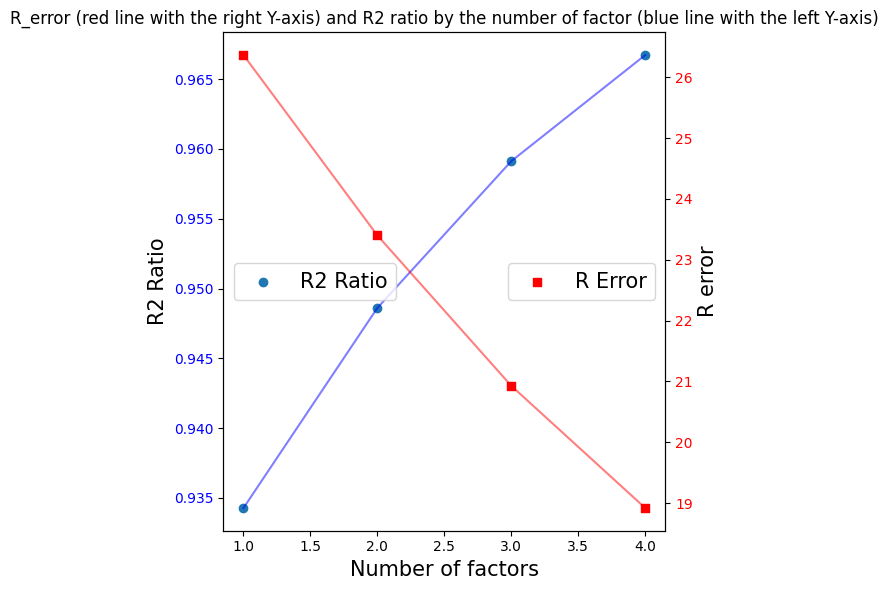

In [ ]:
#그래프로 살펴본 뒤, 적절한 Rank값 설정하기
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title("R_error (red line with the right Y-axis) and R2 ratio by the number of factor (blue line with the left Y-axis)")
ax1.set_xlabel("Number of factors",fontsize = 15)
ax1.set_ylabel("R2 Ratio",fontsize=15)
ax1.scatter(rank_his[:10],r2_ratio[:10])
lns1 = ax1.plot(rank_his,r2_ratio,alpha = 0.5,color=  'blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("R error",fontsize = 15)
ax2.scatter(rank_his,r_error,marker = 's',color = 'red')
lns2 = ax2.plot(rank_his,r_error,alpha = 0.5,color = 'red')
ax2.tick_params(axis = 'y',labelcolor = 'red')

ax1.legend(['R2 Ratio'],fontsize = 15,loc = 'center left')
ax2.legend(['R Error'],fontsize = 15,loc = 'center right')
fig.tight_layout()
plt.show()

##SELECT Optimal Rank r

In [ ]:
#Select Optimal Rank r
#Suppose we choose optimal rank 7 (그래프를 보고 결정)
optimal_rank = 4

#Do parafac2 decomposition
decomposition_opt = parafac2(t,rank = optimal_rank,return_errors = False, tol = 1e-5,n_iter_max = 500,random_state = run)
estimated_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition_opt)
setimated_weights,(e_A,e_B,e_C) = tl.parafac2_tensor.apply_parafac2_projections(decomposition_opt)

#Get R^2 ratio & R_error
#||X^||^2 / ||X||^2
print("R^2 ratio : ",round((la.norm(np.concatenate([estimated_tensor[0],estimated_tensor[1][:800]],axis = 0))**2/(la.norm(np.concatenate([t[0],t[1]],axis = 0))**2)),4))
#||X-X^||
print("R_error : ",round((np.sum((t[0]-estimated_tensor[0])**2) + np.sum((t[1]-estimated_tensor[1][:800])**2))**0.5,4))

R^2 ratio :  0.9345
R_error :  18.9198


##Calculate Euclidean Distance

In [ ]:
def strength_dist(comp_B,comp_C):
    #변수는 논문 기준으로 작성
    result = []
    for idx_b in range(comp_B.shape[1]):
        one_feature = comp_B[:,idx_b]
        feature_distance = []
        for idx_c in range(comp_C.shape[1]):
            one_tensor = comp_C[:,idx_c]
            dist = la.norm(one_feature - one_tensor) #ED_str (논문 :수식 8참고)
            feature_distance.append(dist)
        result.append(feature_distance)
    result = np.array(result)
    return result

##Result

In [ ]:
#위에서 구현한 함수를 이용하여 distance를 구하기
final = strength_dist(e_C.T,e_A.T)

#make dataframe
#51개의 feature와 위에서 구한 distance를 positive와 negative로 나누어서 최종 결과물로 만들기
df = pd.DataFrame({"feature name" : inter,"Truth": final[:,0],"Fake" : final[:,1],"Difference":(final[:,0]-final[:,1])})
#엑셀 파일로 저장하기
#df.to_excel('final_test_2.xlsx',encoding ='utf8')

sort_values_df = df.sort_values(by=['Difference'], ascending=False)
sort_values_df

,feature name,Truth,Fake,Difference
4,ppron,9.653863,9.586168,0.067695
7,i,9.805989,9.762937,0.043052
5,pronoun,9.527218,9.503432,0.023786
16,prep,8.953156,9.008312,-0.055156
9,they,10.078960,10.165388,-0.086428
8,we,10.299422,10.428820,-0.129398
13,verb,9.514910,9.661389,-0.146479
15,negate,10.005088,10.151660,-0.146572
0,ipron,9.776620,9.923511,-0.146891
17,function,9.171492,9.335040,-0.163549


In [ ]:
df

,feature name,Truth,Fake,Difference
0,ipron,9.776620,9.923511,-0.146891
1,adj,9.423484,9.709664,-0.286180
2,conj,9.339166,9.517010,-0.177844
3,det,8.837240,9.031924,-0.194684
4,ppron,9.653863,9.586168,0.067695
5,pronoun,9.527218,9.503432,0.023786
6,adverb,9.783700,9.972636,-0.188937
7,i,9.805989,9.762937,0.043052
8,we,10.299422,10.428820,-0.129398
9,they,10.078960,10.165388,-0.086428


In [ ]:
print(e_C.shape) #-->B
e_C

(18, 4)


array([[ 0.38137892, -0.25809617, -0.29491824,  0.34389434],
       [ 0.93160397,  0.33579786, -0.08237663, -0.08483756],
       [ 0.75340864,  0.03440002,  0.10861   ,  0.49987228],
       [ 1.0334308 ,  1.02881126,  0.85151297,  0.72019084],
       [-0.07870889, -0.07148873,  0.61991191,  1.46457395],
       [ 0.16393376, -0.25549582,  0.32031904,  1.33571621],
       [ 0.63865522, -0.70860732, -0.51390735,  0.24297265],
       [-0.32423155,  0.54045712, -0.98300213,  0.95589351],
       [ 0.3759613 , -0.83696632,  2.37121955,  0.70488098],
       [-0.07697239, -0.11312588,  0.04008851,  0.41748846],
       [ 1.14011215,  1.00928979,  0.59933459,  0.25212638],
       [ 0.89407368, -0.8089435 , -0.84732455,  0.05536512],
       [ 0.75903493,  1.07807748,  0.62764653,  0.28342452],
       [ 0.69608084, -0.587378  , -0.37952979,  0.59498132],
       [ 0.16485885,  0.0779908 , -0.23148699,  0.01679981],
       [ 0.23056494, -0.39216261, -0.22548394,  0.22598853],
       [ 0.56569412,  1.

In [ ]:
e_C_df = pd.DataFrame(e_C)
print("The DataFrame generated from the NumPy array is:")
e_C_df

The DataFrame generated from the NumPy array is:


,0,1,2,3
0,0.381379,-0.258096,-0.294918,0.343894
1,0.931604,0.335798,-0.082377,-0.084838
2,0.753409,0.034400,0.108610,0.499872
3,1.033431,1.028811,0.851513,0.720191
4,-0.078709,-0.071489,0.619912,1.464574
5,0.163934,-0.255496,0.320319,1.335716
6,0.638655,-0.708607,-0.513907,0.242973
7,-0.324232,0.540457,-0.983002,0.955894
8,0.375961,-0.836966,2.371220,0.704881
9,-0.076972,-0.113126,0.040089,0.417488


In [ ]:
print(e_A.shape) #-->C
e_A

(2, 4)


array([[ 8.02406358,  3.00075294, -0.81395196,  5.47050977],
       [ 6.9131905 ,  3.03145799, -0.97917249,  7.0163857 ]])

In [ ]:
#Select Optimal Rank r
#Suppose we choose optimal rank 7 (그래프를 보고 결정)
optimal_rank = 2

#Do parafac2 decomposition
decomposition_opt = parafac2(t,rank = optimal_rank,return_errors = False, tol = 1e-5,n_iter_max = 500,random_state = run)
estimated_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition_opt)
setimated_weights,(e_A,e_B,e_C) = tl.parafac2_tensor.apply_parafac2_projections(decomposition_opt)

#Get R^2 ratio & R_error
#||X^||^2 / ||X||^2
print("R^2 ratio : ",round((la.norm(np.concatenate([estimated_tensor[0],estimated_tensor[1][:800]],axis = 0))**2/(la.norm(np.concatenate([t[0],t[1]],axis = 0))**2)),4))
#||X-X^||
print("R_error : ",round((np.sum((t[0]-estimated_tensor[0])**2) + np.sum((t[1]-estimated_tensor[1][:800])**2))**0.5,4))

#위에서 구현한 함수를 이용하여 distance를 구하기
final = strength_dist(e_C.T,e_A.T)

#make dataframe
#51개의 feature와 위에서 구한 distance를 positive와 negative로 나누어서 최종 결과물로 만들기
df = pd.DataFrame({"feature name" : inter,"Truth": final[:,0],"Fake" : final[:,1],"Difference":(final[:,0]-final[:,1])})
#엑셀 파일로 저장하기
#df.to_excel('final_test_2.xlsx',encoding ='utf8')

sort_values_df = df.sort_values(by=['Difference'], ascending=False)
sort_values_df

R^2 ratio :  0.8999
R_error :  23.4016


,feature name,Truth,Fake,Difference
4,ppron,13.013499,14.240002,-1.226503
7,i,13.305262,14.532777,-1.227516
5,pronoun,12.837953,14.103231,-1.265277
9,they,13.660160,14.994249,-1.334089
15,negate,13.492082,14.878073,-1.385991
0,ipron,13.254387,14.656673,-1.402285
13,verb,12.788635,14.198362,-1.409727
8,we,13.474663,14.887081,-1.412418
14,you,13.686947,15.105647,-1.418699
6,adverb,13.082909,14.513521,-1.430612
